In [87]:
import gymnasium as gym
import ale_py
from gymnasium.utils.play import play
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/nickk/anaconda3/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['info', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [88]:
gym.register_envs(ale_py)
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
obs_0, info = env.reset()
obs, reward, terminated, truncated, info = env.step(0)
env.close()

In [89]:

obs.shape

(210, 160, 3)

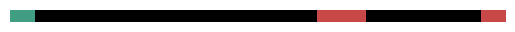

In [62]:
hand_raws = obs[-21: - 17,:,:]
plt.imshow(hand_raws)
plt.axis('off')
plt.show()


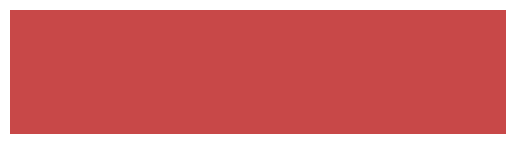

In [63]:
hand = hand_raws[:, 99:115, :]
plt.imshow(hand)
plt.axis('off')
plt.show()

In [64]:
print(hand[0,0,:])

[200  72  72]


In [65]:
def find_rocket(obs):
    rocket_color = [200, 72, 72]  # RGB color of the rocket
    hand_raws = obs[-19, :,:]
    # match the color
    return np.where((hand_raws == rocket_color).all(1))[0][0]

In [66]:
find_rocket(obs)

99

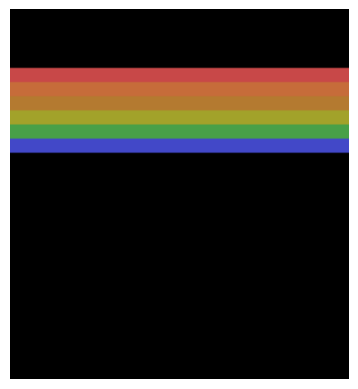

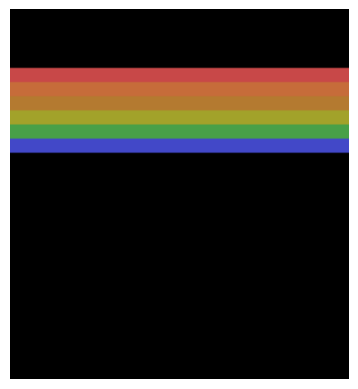

In [67]:
ball_area = obs[32:-21, 8:-8, :]
ball_area_0 = obs_0[32:-21, 8:-8, :]
plt.imshow(ball_area_0)
plt.axis('off')
plt.show()
plt.imshow(ball_area)
plt.axis('off')
plt.show()


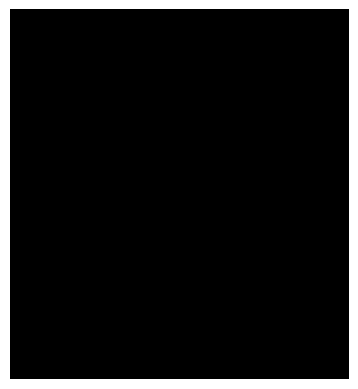

In [68]:
diff = np.abs(ball_area.astype(np.int16) - ball_area_0.astype(np.int16))
plt.imshow(diff.astype(np.uint8))
plt.axis('off')
plt.show()

In [80]:
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
obs_0, info = env.reset()
obs, reward, terminated, truncated, info = env.step(0)
for _ in range(10):
    obs_0 = obs
    obs, reward, terminated, truncated, info = env.step(0)
env.close()

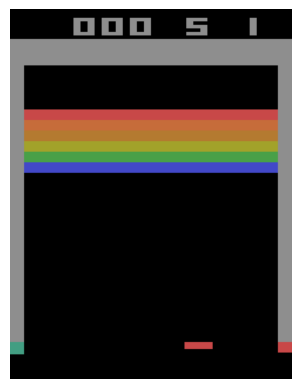

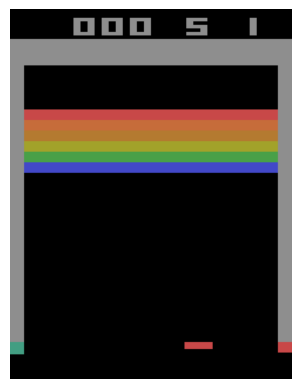

In [81]:
ball_area = obs
ball_area_0 = obs_0
plt.imshow(ball_area_0)
plt.axis('off')
plt.show()
plt.imshow(ball_area)
plt.axis('off')
plt.show()


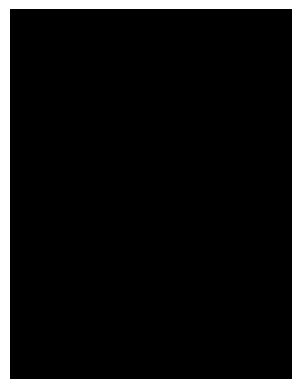

(array([], dtype=int64), array([], dtype=int64))


In [82]:
diff =  np.maximum(0, ball_area.astype(np.int16) - ball_area_0.astype(np.int16))
plt.imshow(diff.astype(np.uint8))
plt.axis('off')
plt.show()
diff_0 = np.sum(diff, axis=2)
print(np.where(diff_0 > 0))

In [ ]:
def find_ball(obs_0, obs):
    diff = np.maximum(0, obs.astype(np.int16) - obs_0.astype(np.int16))
    diff_sum = np.sum(diff, axis=2)
    x_indices, y_indices = np.where(diff_sum > 0)
    if len(x_indices) == 0:
        return None, None
    return x_indices[0], y_indices[0]

In [86]:
x, y = find_ball(obs_0, obs)
print(x, y)

None None


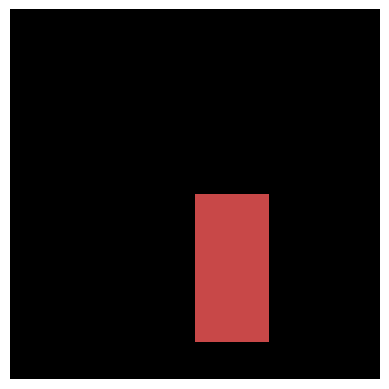

In [74]:
plt.imshow(obs[ x-5:x+5, y-5:y+5, :])
plt.axis('off')
plt.show()

In [75]:
obs[x, y, :]

array([200,  72,  72], dtype=uint8)

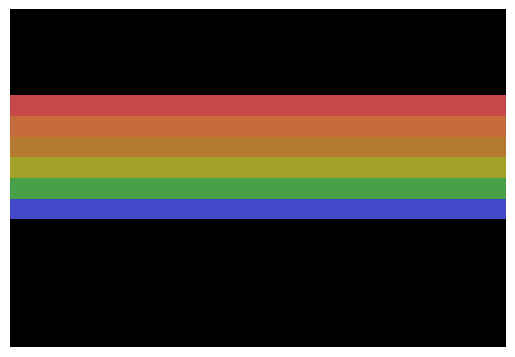

In [76]:
tiles = obs[32: - 80, 8:-8,:]
plt.imshow(tiles)
plt.axis('off')
plt.show()

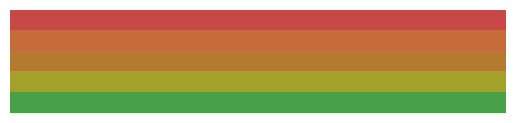

In [77]:
h = 6
w = 8
tiles = obs[57: - 117 - h, 8:-8,:]
plt.imshow(tiles)
plt.axis('off')
plt.show()

In [ ]:
def tile_matrix(obs):
    h = 6
    w = 8
    matrix = np.zeros((6, 18))
    for i in range(6):
        for j in range(18):
            tile_center = obs[57 + i*h + int(h / 2), 8 + j*w + int(w / 2)]
            if (tile_center == [0, 0, 0]).all():
                matrix[i, j] = 0
            else:
                matrix[i, j] = 1
    return matrix

In [79]:
tile_matrix(obs)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])